# Complex yield composition

Test yield tables with standard (solar) composition.

## Results:

$\odot$ The total production of H-1 and Fe-56 can be reproduced.

$\odot$ Analysis of time steps and mass intervals with the t_m_bdys parameter.

$\odot$ Check that non-default mode and default mode give the same results

In [1]:
#from imp import *
#s=load_source('sygma','/home/nugrid/nugrid/SYGMA/SYGMA_online/SYGMA_dev/sygma.py')
%pylab nbagg
import sygma as s
reload(s)
print s.__file__
#import matplotlib
#matplotlib.use('nbagg')
#import matplotlib.pyplot as plt
#matplotlib.use('nbagg')
#import numpy as np
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline
import os

Populating the interactive namespace from numpy and matplotlib
/media/christian/ExtDrive64/NuGrid/NUPYCEE2/sygma.pyc


### Pick two isotopes, H-1 and Fe-56 and check total production

No interpolation of yields as described further below: yield_interp='None'

In [2]:
s1=s.sygma(mgal=1e11,iniZ=0.02,yield_interp='None',imf_type='salpeter',table='yield_tables/isotope_yield_table.txt',sn1a_on=False)
Yield_tot_sim_h1=s1.history.ism_iso_yield[-1][0] #get total final H-1
Yield_tot_sim_fe56=s1.history.ism_iso_yield[-1][60] #get total final H-1
print s1.history.isotopes[0],Yield_tot_sim_h1
print s1.history.isotopes[60],Yield_tot_sim_fe56

SYGMA run in progress..
   SYGMA run completed - Run time: 0.28s
H-1 15635553983.7
Fe-56 201113157.468


In [3]:
import read_yields as ry
path = os.environ['SYGMADIR']+'/yield_tables/isotope_yield_table.txt'
ytables = ry.read_nugrid_yields(path,excludemass=[32,60])

In [4]:
print 'total IMF range: ',s1.imf_bdys
print 'yield IMF range: ',s1.imf_mass_ranges,
masses=[1,1.65,2,3,4,5,6,7,15,20,25] #should be conform with imf_mass_ranges

total IMF range:  [0.1, 100]
yield IMF range:  [[1, 1.325], [1.325, 1.825], [1.825, 2.5], [2.5, 3.5], [3.5, 4.5], [4.5, 5.5], [5.5, 6.5], [6.5, 8], [8, 17.5], [17.5, 22.5], [22.5, 30]]


In [5]:
k_N=1e11*0.35/ (0.1**-0.35 - 100**-0.35) #(I)

In [6]:
k=-1
ytot_h1=0
ytot_fe56=0
for mrange in s1.imf_mass_ranges:
    k=k+1
    N_range=k_N/1.35 * (mrange[0]**-1.35 - mrange[1]**-1.35) #(II)
    y_h1=ytables.get(M=masses[k],Z=0.02,specie='H-1')
    y_fe56=ytables.get(M=masses[k],Z=0.02,specie='Fe-56')
    ytot_h1 = ytot_h1 + y_h1*N_range
    ytot_fe56 = ytot_fe56 + y_fe56*N_range

In [7]:
print 'H-1, should be 1', ytot_h1/Yield_tot_sim_h1
print 'Fe-56, should be 1', ytot_fe56/Yield_tot_sim_fe56


H-1, should be 1 1.00000000117
Fe-56, should be 1 1.00000000117


Note: The yield interpolation to a finer grid via __inter_mm_planee and the scaling of the total ejecta via function func_total_ejecta (chem_evol.py) are skipped by introducing: yield_interp='None'.

### Timesteps & mass intervals

The number of mass intervals can be larger than the number of time steps. This is when
mass inverval boundary lies between two time steps. This occurs at the transition
from one initial mass (which its mass interval) to another initial mass (interval).

In [8]:
print len(s1.history.t_m_bdys)
print len(s1.history.timesteps)
print s1.history.t_m_bdys

34
30
[[22.54938, 30], [22.5, 22.54938], [17.5, 22.5], [16.71016, 17.5], [13.43054, 16.71016], [11.24865, 13.43054], [9.59673, 11.24865], [8.2048, 9.59673], [8, 8.2048], [7.01308, 8], [6.5, 7.01308], [6.00334, 6.5], [5.5, 6.00334], [5.19295, 5.5], [4.53418, 5.19295], [4.5, 4.53418], [4.0002, 4.5], [3.57033, 4.0002], [3.5, 3.57033], [3.20628, 3.5], [2.87206, 3.20628], [2.56435, 2.87206], [2.5, 2.56435], [2.28143, 2.5], [2.0215, 2.28143], [1.825, 2.0215], [1.78348, 1.825], [1.58532, 1.78348], [1.42537, 1.58532], [1.325, 1.42537], [1.29266, 1.325], [1.18033, 1.29266], [1.08379, 1.18033], [1, 1.08379]]


### SNII and SNIa : Compare non-default with default mode: numbers should be the same

Do we really need this comparison?

In [9]:
s7=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1e9,imf_type='salpeter',imf_bdys=[1,30],special_timesteps=-1,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=True, sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn',pop3_table='yield_tables/popIII_h1.txt')
s8=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1e9,imf_type='salpeter',imf_bdys=[1,30],special_timesteps=-1,iniZ=0.0001)

SYGMA run in progress..
   SYGMA run completed - Run time: 2.06s
SYGMA run in progress..
   SYGMA run completed - Run time: 2.34s


<IPython.core.display.Javascript object>


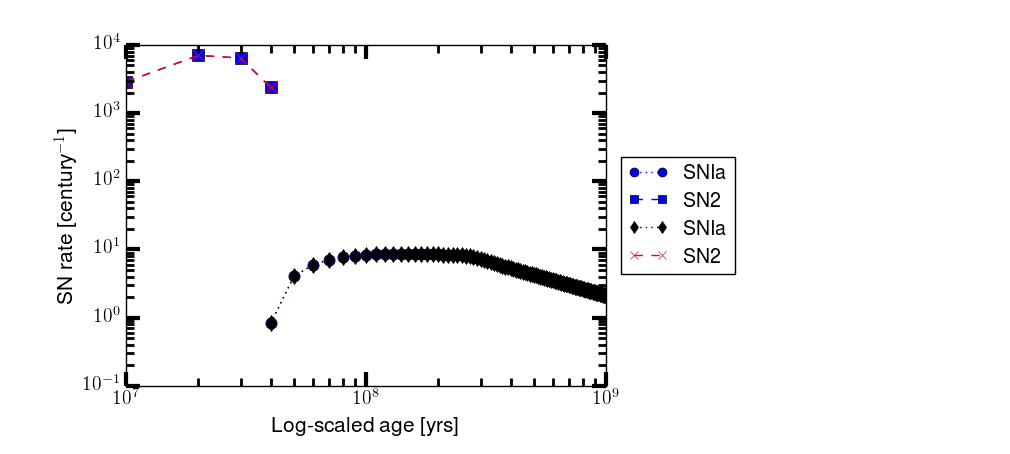

In [10]:
s7.plot_sn_distr(marker1='o',color1='b',marker2='s',markevery=1)
s8.plot_sn_distr(marker1='d',marker2='x',color2='r',markevery=1)